58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,767,365 (60.15 MB)

 Trainable params: 1,052,677 (4.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicted class index: 0
Predicted disease: Melanoma


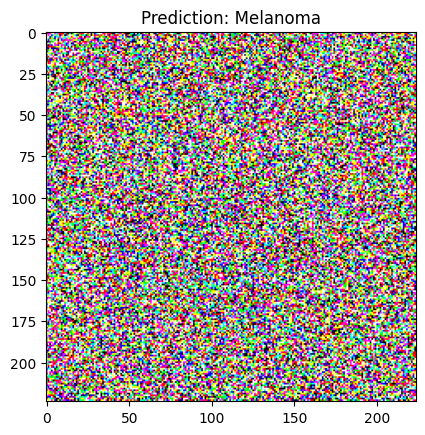

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model + higher-level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base_model
base_model.trainable = False

# Create the new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust number of classes (5 in this example)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Function to generate a random image (for demonstration purposes)
def generate_random_image():
    # Create a random image of shape (224, 224, 3) with pixel values between 0 and 255
    random_image = np.random.randint(0, 256, size=(224, 224, 3), dtype=np.uint8)
    return random_image

# Function to preprocess the random image for prediction
def preprocess_image(img_array):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Preprocess for VGG16
    return img_array

# Example of using the model for prediction with a random image
def predict_skin_disease():
    # Generate a random image (you can replace this with a real image array)
    img_array = generate_random_image()

    # Preprocess the image
    img_array = preprocess_image(img_array)

    # Make prediction
    prediction = model.predict(img_array)  # Predict on the input image
    predicted_class = np.argmax(prediction, axis=1)  # Get the class index
    print(f"Predicted class index: {predicted_class[0]}")

    # Mapping the predicted class index to disease names
    class_names = ['Melanoma', 'Basal Cell Carcinoma', 'Squamous Cell Carcinoma', 'Vascular Skin Tumor', 'Actinic Keratosis']
    predicted_disease = class_names[predicted_class[0]]
    print(f"Predicted disease: {predicted_disease}")

    # Visualize the random image (for demonstration)
    plt.imshow(img_array[0])
    plt.title(f"Prediction: {predicted_disease}")
    plt.show()

# Run the prediction
predict_skin_disease()
